- We're going to build a network to classify Reuters newswires into 46 mutually exclusive topics. 
- Because each data point should be classified into only one category, the problem is an instance of single-label, multiclass classification.

In [106]:
from keras.datasets import reuters
import numpy as np
import pandas as pd
from keras import models 
from keras import layers
import matplotlib.pyplot as plt


In [107]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [108]:
len(train_data)

8982

In [109]:
len(test_data)

2246

In [110]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [111]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [112]:
train_labels[10]

3

In [113]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [114]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [115]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
# a dense layer of size 46 means that for each input sample, the network will output
# a 46-dimensional vector
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [116]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)



Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3832 - loss: 3.3753 - val_accuracy: 0.5910 - val_loss: 2.0248
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6494 - loss: 1.7547 - val_accuracy: 0.6920 - val_loss: 1.4597
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7243 - loss: 1.2931 - val_accuracy: 0.7440 - val_loss: 1.2551
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7809 - loss: 1.0532 - val_accuracy: 0.7760 - val_loss: 1.1136
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8227 - loss: 0.8604 - val_accuracy: 0.7820 - val_loss: 1.0222
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8503 - loss: 0.6979 - val_accuracy: 0.8060 - val_loss: 0.9623
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8772 - loss: 0.5901 - val_accuracy: 0.8070 - val_loss: 0.9247
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8940 - loss: 0.5030 - val_accuracy: 0.8100 - val_loss

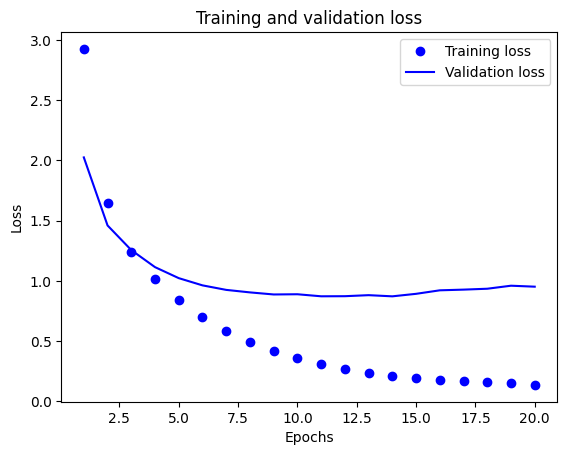

In [117]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [118]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

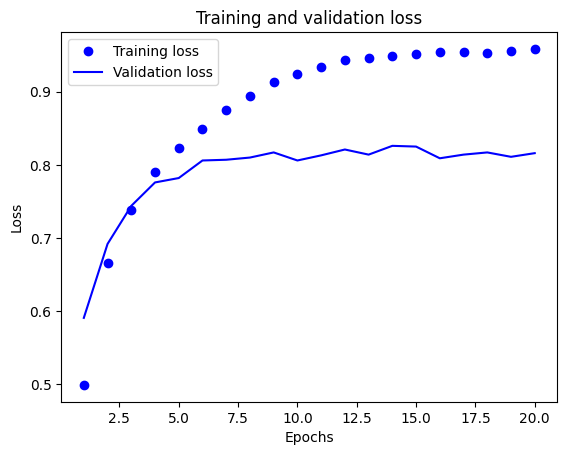

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs.

In [124]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer= 'rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data = (x_val, y_val))


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3852 - loss: 3.1303 - val_accuracy: 0.6110 - val_loss: 1.7746
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6705 - loss: 1.5774 - val_accuracy: 0.7070 - val_loss: 1.3487
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 1.2081 - val_accuracy: 0.7510 - val_loss: 1.1787
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7912 - loss: 0.9707 - val_accuracy: 0.7680 - val_loss: 1.0718
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8180 - loss: 0.8224 - val_accuracy: 0.7880 - val_loss: 1.0096
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8583 - loss: 0.6569 - val_accuracy: 0.8060 - val_loss: 0.9415
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8864 - loss: 0.5380 - val_accuracy: 0.8080 - val_loss: 0.9055
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.4445 - val_accuracy: 0.8180 - val_loss: 0.8739

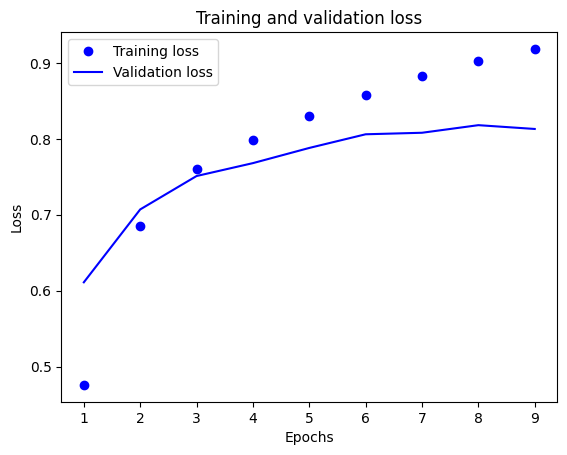

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.8818


[0.9306015372276306, 0.7916295528411865]